<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 10

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">Leia o artigo sobre as lâmpadas incandescentes em anexo. Utilizando os dados do tempo de vida médio da tabela e assumindo uma dependência polinomial com a tensão da rede elétrica, compare o valor do expoente n da equação do tempo de vida para a lâmpada de 120 V, 100 W e da lâmpada 127 V, 100W. </div>

|Lâmpada|120V/100W|127V/100W|
|:-:	|:-:	                    |:-:|
|Tensão (V)|Vida média (h)|Vida média (h)|
|106|3800|3800|
|115|1814|3800|
|116|1607|3555|
|121|890|1969|
|127|452|1000|
|132|263|582|


---


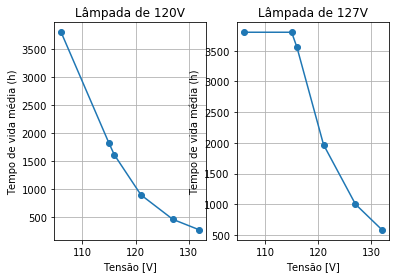

In [8]:
import matplotlib.pyplot as plt
import notebook_importer
import numpy as np
from modules import IE325


# ----- Dados
tensao = [106,115,116,121,127,132]
lamp_120 = [3800,1814,1607,890,452,263]
lamp_127 = [3800,3800,3555,1969,1000,582]


fig, axes = plt.subplots(1, 2,sharex='all')

axes[0].plot(tensao,lamp_120,'-o')
axes[1].plot(tensao,lamp_127,'-o')
axes[0].set_title('Lâmpada de 120V')
axes[0].set_xlabel('Tensão [V]')
axes[0].set_ylabel('Tempo de vida média (h)')
axes[0].grid()
axes[1].set_title('Lâmpada de 127V')
axes[1].set_xlabel('Tensão [V]')
axes[1].set_ylabel('Tempo de vida média (h)')
axes[1].grid()
plt.show() 

Pelos gráficos acima vemos que a **variação do tempo de vida** para a **lâmpada de 120V se inicia em 106V** e para a **lâmpada de 127V se inicia em 115V**. Portanto, a Lei do tempo de vida será aplicada a partir desses valores.

---

##### Expoente n

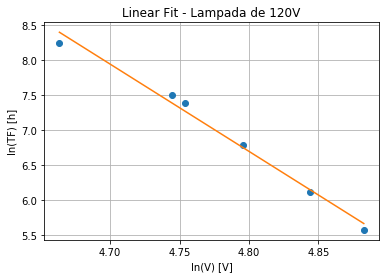

O valor do expoente n para a lâmpada de 120V é: 12.46
TF(csi) = 7.478e+28.(csi)^(-1.246e+01)





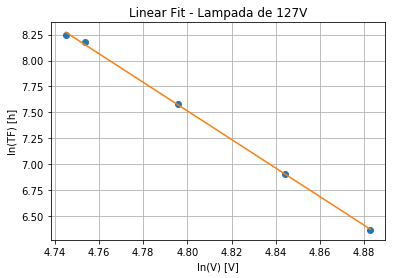

O valor do expoente n para a lâmpada de 127V é: 13.77
TF(csi) = 9.358e+31.(csi)^(-1.377e+01)


In [9]:
PL_120 = IE325.TF_PowerLaw('csi',lamp_120,tensao)
PL_127 = IE325.TF_PowerLaw('csi',lamp_127[1:],tensao[1:])

# ----- Dados linearizados
xlin_120, ylin_120 = PL_120.LinearData_n()
xlin_127, ylin_127 = PL_127.LinearData_n()

# ----- Plot  
plt.figure()
plt.plot(xlin_120,ylin_120,'o', xlin_120, PL_120.LinearFit_n())
plt.title('Linear Fit - Lampada de 120V')
plt.xlabel('ln(V) [V]')
plt.ylabel('ln(TF) [h]')
plt.grid()
plt.show() 

#Variaveis do linear fit
print("O valor do expoente n para a lâmpada de 120V é: %.2f" %PL_120.n)
print(PL_120.Law())
print("\n\n")

# ----- Plot    
plt.plot(xlin_127,ylin_127,'o', xlin_127, PL_127.LinearFit_n())
plt.title('Linear Fit - Lampada de 127V')
plt.xlabel('ln(V) [V]')
plt.ylabel('ln(TF) [h]')
plt.grid()
plt.show() 

#Variaveis do linear fit
print("O valor do expoente n para a lâmpada de 127V é: %.2f" %PL_127.n)
print(PL_127.Law())


É possível notar, pelos gráficos de tempo de vida média, que o decaimento do tempo de vida com o aumento da tensão para a lâmpada de 127V é maior. Isso se reflete nos expoentes n encontrados:

** *13.77 para 127V* **

** *12.46 para 120V* **

---
##### Série de dados

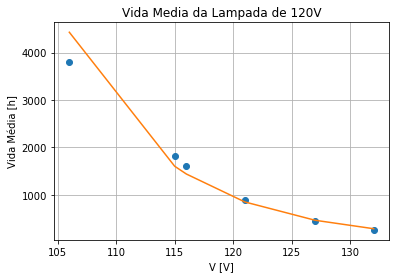

Equação de regimento - Lampada 120V:

TF(csi) = 7.478e+28.(csi)^(-1.246e+01)





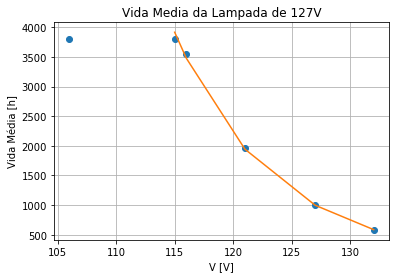

Equação de regimento - Lampada 127V:

TF(csi) = 9.358e+31.(csi)^(-1.377e+01)


In [4]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS E FIT POWER LAW - LAMPADA 120V
# --------------------------------------------------------
plt.plot(tensao,lamp_120,'o',tensao, PL_120.Find_TF(tensao))
plt.title('Vida Media da Lampada de 120V')
plt.xlabel('V [V]')
plt.ylabel('Vida Média [h]')
plt.grid()
fig = plt.gcf()
plt.show()
print("Equação de regimento - Lampada 120V:\n")
print(PL_120.Law(decimal = 3))
print("\n\n")

# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS E FIT POWER LAW - LAMPADA 127V
# --------------------------------------------------------
plt.plot(tensao,lamp_127,'o',tensao[1:], PL_127.Find_TF(tensao[1:]))
plt.title('Vida Media da Lampada de 127V')
plt.xlabel('V [V]')
plt.ylabel('Vida Média [h]')
plt.grid()
fig = plt.gcf()
plt.show()
print("Equação de regimento - Lampada 127V:\n")
print(PL_127.Law(decimal = 3))

O expoente para a **lâmpada de 120V é de 12.46**, enquanto o expoente para a **lâmpada de 127 é de 13.77**, caracterizando um decaimento mais rapido do tempo de vida em função do aumento da tensão para a lâmpada de 127V. Entretanto, a **redução no tempo de vida para a lâmpada de 127V se inicia em 115V**, ou seja, a redução é tardia se comparada a **redução da lâmpada de 120V a partir de 106V.**


---

##### Variáveis Associadas - Lâmpada 120V

In [6]:
print("LAMPADA 120V:\n")
print(PL_120.Variables())

LAMPADA 120V:

-----
Linear Fit Variables - Power Law

Finding N exponent
a (slope coef) = -12.4561395283
b (intercept coef) = 66.4843939749
Correlation coefficient = -0.993544600943
Standard error = 0.711116288434

-----
Time to Failure Variables - Power Law
n = 12.4561395283
Q = not calculated [eV]
Ao = not calculated




##### Variáveis Associadas - Lâmpada 127V

In [7]:
print("LAMPADA 127V:\n")
print(PL_127.Variables())

LAMPADA 127V:

-----
Linear Fit Variables - Power Law

Finding N exponent
a (slope coef) = -13.7712567829
b (intercept coef) = 73.6163779721
Correlation coefficient = -0.999689815069
Standard error = 0.198079415743

-----
Time to Failure Variables - Power Law
n = 13.7712567829
Q = not calculated [eV]
Ao = not calculated


